In [62]:
# load csv

# Read the file to see its structure and check how the tables are separated
from ast import parse
from pdb import run
import re
import pandas as pd

def parse_cd_csv(file_path):
    with open(file_path, "r") as file:
        file_content = file.read()
    
    # Split the content to find the "Data:" section
    data_section = file_content.split("Data:\n\n")[1]
    
    # Split the data section into individual table sections (split by one empty line, accounting for blank lines)
    tables_raw = re.split(r'\n\n+', data_section.strip())
    
    # Initialize an empty dictionary to hold the tables
    tables = {}
    
    run_df = pd.DataFrame(columns=['Wavelength', 'Temperature'])
    # Loop through the raw tables and parse them
    for section in tables_raw:
        # Adjusting the regex to capture all possible table titles, including CircularDichroism
        match = re.search(r'(CircularDichroism|HV|Absorbance|Voltage|Count|SE)', section)
        if match:
            title = match.group(1)
            
            # Split the section into lines
            lines = section.strip().split('\n')
            
            # The second line contains the index and column headers (e.g., Wavelength,Temperature)
            index_and_columns = lines[1].split(',')
            
            # The third line contains the actual column headers (e.g., ,5,10,15,20,...)
            column_headers = lines[2].split(',')
            
            # The rest of the lines are data rows
            data = [line.split(',') for line in lines[3:] if line.strip()]
            
            # Ensure the number of columns matches, trimming or padding the headers if necessary
            max_columns = max(len(row) for row in data)
            adjusted_column_headers = column_headers[:max_columns]
            if len(adjusted_column_headers) < max_columns:
                adjusted_column_headers += [''] * (max_columns - len(adjusted_column_headers))
            
            # Create a DataFrame
            df = pd.DataFrame(data, columns=[index_and_columns[0]] + adjusted_column_headers[1:])
            df.set_index(index_and_columns[0], inplace=True)
            
            # Convert the data to numeric where possible
            df = df.apply(pd.to_numeric, errors='coerce')
            df = df.reset_index()  # Wavelength should not be the index
            df = df.astype(float)  # Set all other columns as float
            df['Wavelength'] = df['Wavelength'].astype(int)  # Set Wavelength as int


            # If the table is CircularDichroism, melt the table
            # if title == "CircularDichroism":
            df = df.melt(id_vars=["Wavelength"], var_name="Temperature", value_name=title)
            if run_df.empty:
                run_df=df
            else:
                run_df = pd.merge(run_df, df, on=['Wavelength', 'Temperature'])
    return run_df




# Parse the tables again using the updated approach
melt_df = parse_cd_csv(
    "/home/tadas/code/CD_analysis/deltaprot1_50uM_5C_80Cmelt00002.csv"
)
post_melt_df = parse_cd_csv("/home/tadas/code/CD_analysis/deltaprot1_50uM_5C_postmelt00000.csv")

melt_df



,Wavelength,Temperature,CircularDichroism,HV,Absorbance,Voltage,Count,SE
0,280,5,0.513833,245.636,0.027305,8.101720,10000.0,0.103118
1,279,5,0.555257,245.651,0.026697,8.098030,10000.0,0.092377
2,278,5,0.536025,245.651,0.025734,8.075350,10000.0,0.083534
3,277,5,0.516483,245.651,0.027355,8.041090,10000.0,0.095587
4,276,5,0.340688,245.712,0.028184,8.035440,10000.0,0.097740
...,...,...,...,...,...,...,...,...
1611,184,80,22.710500,669.266,2.822320,8.118650,10000.0,1.620190
1612,183,80,23.114400,923.477,3.678840,7.981320,10000.0,3.051120
1613,182,80,37.404800,999.985,4.606990,1.359440,10000.0,9.094610
1614,181,80,-12.245600,999.985,5.518770,0.129647,10000.0,31.184000


/tmp/ipykernel_980/774532154.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=temp_data, x='Wavelength', y='MRE_deg_cm2_dmol', label=f'{temp}°C', palette='coolwarm')
/tmp/ipykernel_980/774532154.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=temp_data, x='Wavelength', y='MRE_deg_cm2_dmol', label=f'{temp}°C', palette='coolwarm')
/tmp/ipykernel_980/774532154.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=temp_data, x='Wavelength', y='MRE_deg_cm2_dmol', label=f'{temp}°C', palette='coolwarm')
/tmp/ipykernel_980/774532154.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=temp_data, x='Wavelength', y='MRE_deg_cm2_dmol', label=f'{temp}°C', palette='coolwarm')
/tmp/ipykernel_980/774532154.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s

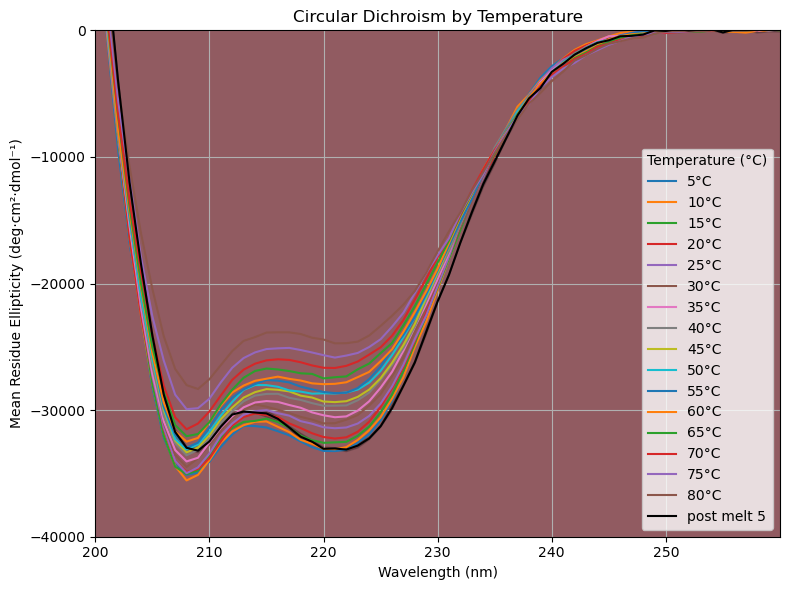

/tmp/ipykernel_980/774532154.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=temp_data, x='Wavelength', y='MRE_deg_cm2_dmol', label=f'{temp}°C', palette='coolwarm')
/tmp/ipykernel_980/774532154.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=temp_data, x='Wavelength', y='MRE_deg_cm2_dmol', label=f'{temp}°C', palette='coolwarm')
/tmp/ipykernel_980/774532154.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=temp_data, x='Wavelength', y='MRE_deg_cm2_dmol', label=f'{temp}°C', palette='coolwarm')
/tmp/ipykernel_980/774532154.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=temp_data, x='Wavelength', y='MRE_deg_cm2_dmol', label=f'{temp}°C', palette='coolwarm')
/tmp/ipykernel_980/774532154.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s

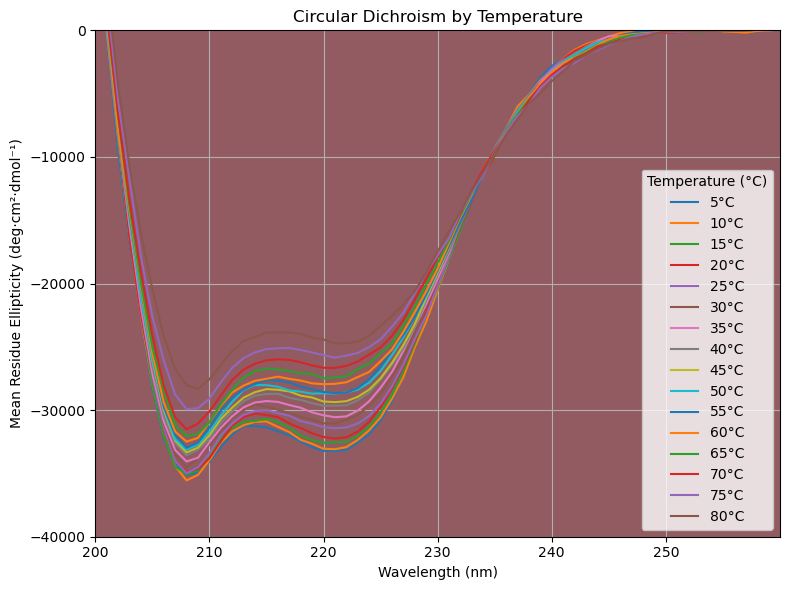

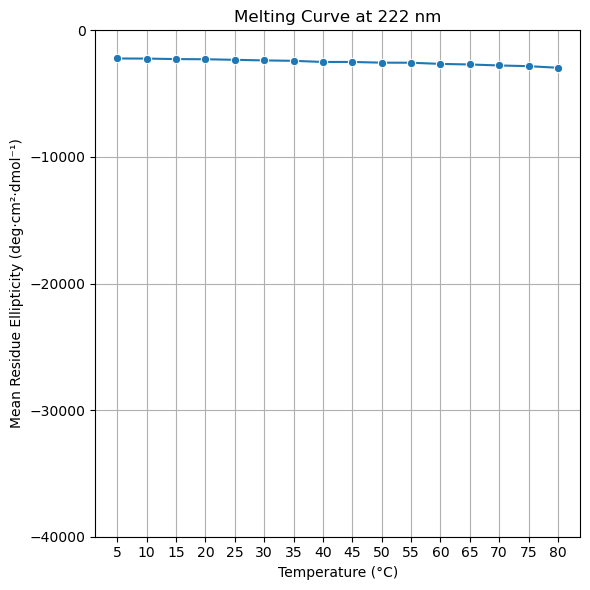

In [67]:
# Define the plotting function for Circular Dichroism data
import os
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

def get_mean_residue_ellipticity(        protein_concentration_uM=50, 
                path_length_mm=0.5, 
                num_residues=33, 
                ):

    
    # Step 1: Convert Path Length from mm to cm
    path_length_cm = path_length_mm / 10  # 1 cm = 10 mm
    
    # Step 3: Convert Protein Concentration from µM to g/mL
    concentration_M = protein_concentration_uM * 1e-6  # Convert µM to M

    multiplication_factor = 1/(10*path_length_cm*num_residues*concentration_M)
    # Step 6: Calculate MRE
    # mre = observed_cd_mdeg*multiplication_factor

    return multiplication_factor



def plot_cd_melt_data(cd_data, sample_name, overlay_cd_data=None, overlay_label="Overlay", title="Circular Dichroism by Temperature", save_dir="."):
    # Calculate smoothed CD values and Mean Residue Ellipticity (MRE)
    cd_data['Weight'] = 1 / (cd_data['SE'] + 0.0001)  # Adding a small constant to avoid division by zero
    cd_data['Smoothed_CD'] = np.convolve(cd_data['CircularDichroism'] * cd_data['Weight'], np.ones(3)/3, mode='same') / np.convolve(cd_data['Weight'], np.ones(3)/3, mode='same')
    cd_data['MRE_deg_cm2_dmol'] = cd_data['Smoothed_CD']*get_mean_residue_ellipticity()
    cd_data["SE"]= cd_data['SE']*get_mean_residue_ellipticity()

    x_limits = (200, 260)
    y_limits = (-40000, 1)

    # Filter the data for wavelengths between 200 and 280 nm
    cd_filtered = cd_data[(cd_data['Wavelength'] >= x_limits[0]) & (cd_data['Wavelength'] <= x_limits[1])]

    # Set up the seaborn plot with appropriate labels
    plt.figure(figsize=(8, 6))
    
    # Loop through each temperature to plot lines with SE error areas
    for temp in cd_filtered['Temperature'].unique():
        temp_data = cd_filtered[cd_filtered['Temperature'] == temp]
        
        # Plot the smoothed CD line
        sns.lineplot(data=temp_data, x='Wavelength', y='MRE_deg_cm2_dmol', label=f'{temp}°C', palette='coolwarm')
        
        # Plot the SE error area using fill_between
        plt.fill_between(
            temp_data['Wavelength'],
            temp_data['MRE_deg_cm2_dmol'] - temp_data['SE'],  # Lower bound (CD - SE)
            temp_data['MRE_deg_cm2_dmol'] + temp_data['SE'],  # Upper bound (CD + SE)
            alpha=0.5  # Transparency for the shaded area
        )

    filename = f"cd_melts_{sample_name}"

    # Check if there is another dataset to overlay
    if overlay_cd_data is not None:
        filename += "_overlay"
        overlay_cd_data['MRE_deg_cm2_dmol'] = overlay_cd_data['CircularDichroism']*get_mean_residue_ellipticity()
        # Filter the overlay data for wavelengths between 200 and 280 nm
        overlay_cd_filtered = overlay_cd_data[(overlay_cd_data['Wavelength'] >= x_limits[0]) & (overlay_cd_data['Wavelength'] <= x_limits[1])]
        
        # Plot the overlay data in black without hue (same color for all temperatures)
        sns.lineplot(data=overlay_cd_filtered, x='Wavelength', y='MRE_deg_cm2_dmol', color='black', label=overlay_label)

    # Customize the plot
    plt.title(title)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel("Mean Residue Ellipticity (deg·cm²·dmol⁻¹)")
    plt.xticks(range(x_limits[0], x_limits[1], 10))  # Set ticks at every 10 nm
    plt.yticks(range(y_limits[0], y_limits[1], 10000))  # Set ticks at every 10 nm
    plt.xlim(x_limits)
    plt.ylim(y_limits)
    plt.grid(True)

    # Move the legend to a better position (outside the plot)
    plt.legend(title='Temperature (°C)', loc='best')
    plt.margins(x=0)
    
    for ext in ["png", "svg"]:
        plt.savefig(os.path.join(save_dir, f"{filename}.{ext}"), dpi=300, bbox_inches="tight")
    
    plt.tight_layout()
    plt.show()



# Define the function to plot the melting curve at 222 nm
def plot_melting_curve(cd_data,sample_name, title="Melting Curve at 222 nm",save_dir="."):
    # x_limits = (200,260)
    y_limits = (-40000,1)

    cd_data['MRE_deg_cm2_dmol'] = cd_data['CircularDichroism'].apply(get_mean_residue_ellipticity)
    # Filter the data for Wavelength = 222 nm
    melting_data = cd_data[cd_data['Wavelength'] == 222.0]

    # Set up the plot for the melting curve
    plt.figure(figsize=(6, 6))
    sns.lineplot(data=melting_data, x='Temperature', y='MRE_deg_cm2_dmol', marker='o')
    # plt.xticks(range(x_limits[0], x_limits[1], 10))  # Set ticks at every 10 nm
    plt.yticks(range(y_limits[0], y_limits[1], 10000))  # Set ticks at every 10 nm
    # plt.xlim(x_limits)
    plt.ylim(y_limits)
    # Customize the plot
    plt.title(title)
    plt.xlabel('Temperature (°C)')
    plt.ylabel("Mean Residue Ellipticity (deg·cm²·dmol⁻¹)")
    plt.grid(True)
    plt.tight_layout()
    
    for ext in ["png","svg"]:
        plt.savefig(os.path.join(save_dir,f"melting_curve_{sample_name}.{ext}"),dpi=300, bbox_inches="tight")
    
    plt.show()

# Call the plotting functions
plot_cd_melt_data(melt_df,sample_name="deltaprot1",overlay_label="post melt 5",overlay_cd_data=post_melt_df)
plot_cd_melt_data(melt_df,sample_name="deltaprot1")
plot_melting_curve(melt_df,sample_name="deltaprot1")
